In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [15]:
stem = '../../nf_pipeline/outputs/SRRS_20220527_perm/gene_ont'

data = {
    'f_name':[],
    'num_gene_sample_onts':[],
    'num_significant':[],
}
for f_path in sorted(glob.glob(os.path.join(stem,'*.csv'))):
    f_name = os.path.basename(f_path)
    
    df = pd.read_csv(f_path)
    data['f_name'].append(f_name)
    data['num_gene_sample_onts'].append(len(df))
    data['num_significant'].append(df['bh_p'].le(0.05).sum())
    
    #note, grabbing one of the punctate tables to see what's wrong
    if 'punctate' in f_name:
        test_df = df.copy()
    
fdr_df = pd.DataFrame(data)
fdr_df

,f_name,num_gene_sample_onts,num_significant
0,BICCN_mouse1_central_gene_ont.csv,20090,0
1,BICCN_mouse1_peripheral_gene_ont.csv,20090,0
2,BICCN_mouse1_punctate_gene_ont.csv,13189,12980
3,BICCN_mouse1_radial_gene_ont.csv,13189,13146
4,BICCN_mouse2_central_gene_ont.csv,18142,0
5,BICCN_mouse2_peripheral_gene_ont.csv,18142,0
6,BICCN_mouse2_punctate_gene_ont.csv,11303,11153
7,BICCN_mouse2_radial_gene_ont.csv,11303,11260
8,CZB_kidney_central_gene_ont.csv,2789,0
9,CZB_kidney_peripheral_gene_ont.csv,2789,0


In [16]:
test_df

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
0,seqfish,seqfish,puncta,A230056j06rik,Excitatory layer 5/6,23,2.0,5708.0,0.384,7.871198,3.552714e-15,8.376615e-15
1,seqfish,seqfish,puncta,Aacs,Excitatory layer 5/6,35,2.0,4071.0,0.000,3.188434,1.430458e-03,1.896188e-03
2,seqfish,seqfish,puncta,Aamp,Excitatory 5/6,22,3.5,5113.0,0.043,6.474366,9.521117e-11,1.862561e-10
3,seqfish,seqfish,puncta,Aamp,Excitatory layer 3,40,3.0,4056.5,0.018,10.017861,0.000000e+00,0.000000e+00
4,seqfish,seqfish,puncta,Aamp,Excitatory layer 5/6,73,3.0,3707.0,-0.238,-24.937216,2.938873e-137,1.424151e-136
...,...,...,...,...,...,...,...,...,...,...,...,...
4555,seqfish,seqfish,puncta,Znrf3,Excitatory layer 5/6,21,2.0,6280.0,0.062,-3.068607,2.150594e-03,2.805926e-03
4556,seqfish,seqfish,puncta,Zranb1,Excitatory layer 5/6,22,2.0,5294.0,-0.018,-0.437140,6.620099e-01,6.876458e-01
4557,seqfish,seqfish,puncta,Zrsr1,Excitatory layer 5/6,23,2.0,4071.0,0.252,4.781894,1.736512e-06,2.781347e-06
4558,seqfish,seqfish,puncta,Zswim8,Excitatory layer 5/6,27,2.0,4394.0,-0.058,-3.745759,1.798490e-04,2.534337e-04


In [22]:
q = pd.read_csv('../../nf_pipeline/outputs/SRRS_20220527_perm/gene_cell/BICCN_mouse1_peripheral_gene_cell.csv')
q.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
0,periph,222098490380092065288492113826920653088,L23_IT_1,521,Acta2,3,-0.592308,0.199997,BICCN_mouse1,m1s1
1,periph,222098490380092065288492113826920653088,L23_IT_1,521,Ano4,3,-0.238462,0.199997,BICCN_mouse1,m1s1
2,periph,222098490380092065288492113826920653088,L23_IT_1,521,Aqp4,2,-0.394231,0.166986,BICCN_mouse1,m1s1
3,periph,222098490380092065288492113826920653088,L23_IT_1,521,Bcl11b,4,-0.334615,0.133074,BICCN_mouse1,m1s1
4,periph,222098490380092065288492113826920653088,L23_IT_1,521,Blank-9,1,-0.676923,0.334615,BICCN_mouse1,m1s1


In [17]:
x = pd.read_csv('../../nf_pipeline/outputs/SRRS_20220527_perm/gene_cell/BICCN_mouse1_punctate_gene_cell.csv')
x.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,experiment,sample
0,puncta,129833550955770907974149597757149714116,unannotated,207,Sema5a,8,-0.942,0.000019,BICCN_mouse1,m1s1
1,puncta,129833550955770907974149597757149714116,unannotated,207,Igfbp4,16,-0.362,0.000017,BICCN_mouse1,m1s1
2,puncta,129833550955770907974149597757149714116,unannotated,207,Rnf152,11,0.196,0.000018,BICCN_mouse1,m1s1
3,puncta,129833550955770907974149597757149714116,unannotated,207,Epha7,7,-0.088,0.000021,BICCN_mouse1,m1s1
4,puncta,129833550955770907974149597757149714116,unannotated,207,Fezf2,4,-0.594,0.000027,BICCN_mouse1,m1s1


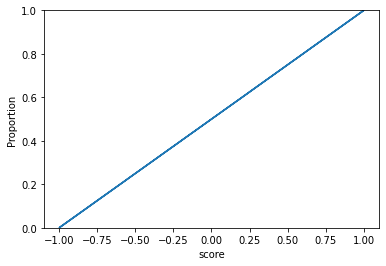

In [21]:
sns.ecdfplot(x['score'])
plt.show()
plt.close()

In [14]:
df[df['med_gene_spots'].gt(10)]

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p
128,BICCN_mouse1,m1s1,puncta,Acta2,SMC,1235,27.0,332.0,0.074,425.766113,0.000000e+00,0.000000e+00
194,BICCN_mouse1,m1s3,puncta,Adamts4,Astro_3,31,14.0,289.0,-0.040,79.657274,0.000000e+00,0.000000e+00
236,BICCN_mouse1,m1s1,puncta,Adamts4,Oligo_1,2157,18.0,235.0,-0.018,-177.750948,0.000000e+00,0.000000e+00
237,BICCN_mouse1,m1s1,puncta,Adamts4,Oligo_2,1130,17.0,250.0,0.003,96.056489,0.000000e+00,0.000000e+00
238,BICCN_mouse1,m1s1,puncta,Adamts4,Oligo_3,295,23.0,405.0,0.038,-7.468894,8.087158e-14,8.589959e-14
...,...,...,...,...,...,...,...,...,...,...,...,...
13056,BICCN_mouse1,m1s6,puncta,Wipf3,ventricle_2,25,12.0,424.0,0.228,206.970303,0.000000e+00,0.000000e+00
13067,BICCN_mouse1,m1s1,puncta,Wnt7b,L45_IT_3,1844,17.0,461.5,-0.050,-325.935225,0.000000e+00,0.000000e+00
13079,BICCN_mouse1,m1s1,puncta,Wnt7b,L5_IT_1,2853,15.0,561.0,-0.028,-295.128910,0.000000e+00,0.000000e+00
13080,BICCN_mouse1,m1s1,puncta,Wnt7b,L5_IT_2,1477,22.0,556.0,0.040,274.268878,0.000000e+00,0.000000e+00
